In [1]:
import pandas as pd
smiles = pd.read_csv("../input_data/sub_space_with_valid.csv", quotechar='#')

In [2]:
#calculating distance matrix from MACCS Keys
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit import Chem
from rdkit import DataStructs
import numpy
mol1 = smiles['SMILES']
mol2 = smiles['SMILES']
fpgen = AllChem.GetMorganGenerator(radius=3,fpSize=2048)
similarity_matrix = numpy.empty(len(smiles["SMILES"]))
for item1 in mol1:
    similarity = list()
    for item2 in mol2:
        mol_1 = Chem.MolFromSmiles(item1)
        fp1 = Chem.MACCSkeys.GenMACCSKeys(mol_1)
        mol_2 = Chem.MolFromSmiles(item2)
        fp2 = Chem.MACCSkeys.GenMACCSKeys(mol_2)
        similarity.append(DataStructs.DiceSimilarity(fp1,fp2))
    similarity_matrix = numpy.vstack((similarity_matrix, similarity))
similarity_matrix = similarity_matrix[1:]

In [3]:
#Dimensionality reduction with t-SNE and perplexity scouting
from sklearn import manifold
perplex = list(range(0,15,1))
S_t_sne = dict()
for item in perplex:
    t_sne = manifold.TSNE(
    n_components=2,
    perplexity=item,
    init="random",
    random_state=0)
    temp_df = t_sne.fit_transform(similarity_matrix)
    temp_df = pd.DataFrame(temp_df)
    temp_df["Substrate"] = smiles['Substrate']
    temp_df.columns = ["tsne1", 'tsne2', 'Substrate']
    S_t_sne[item] = temp_df
    

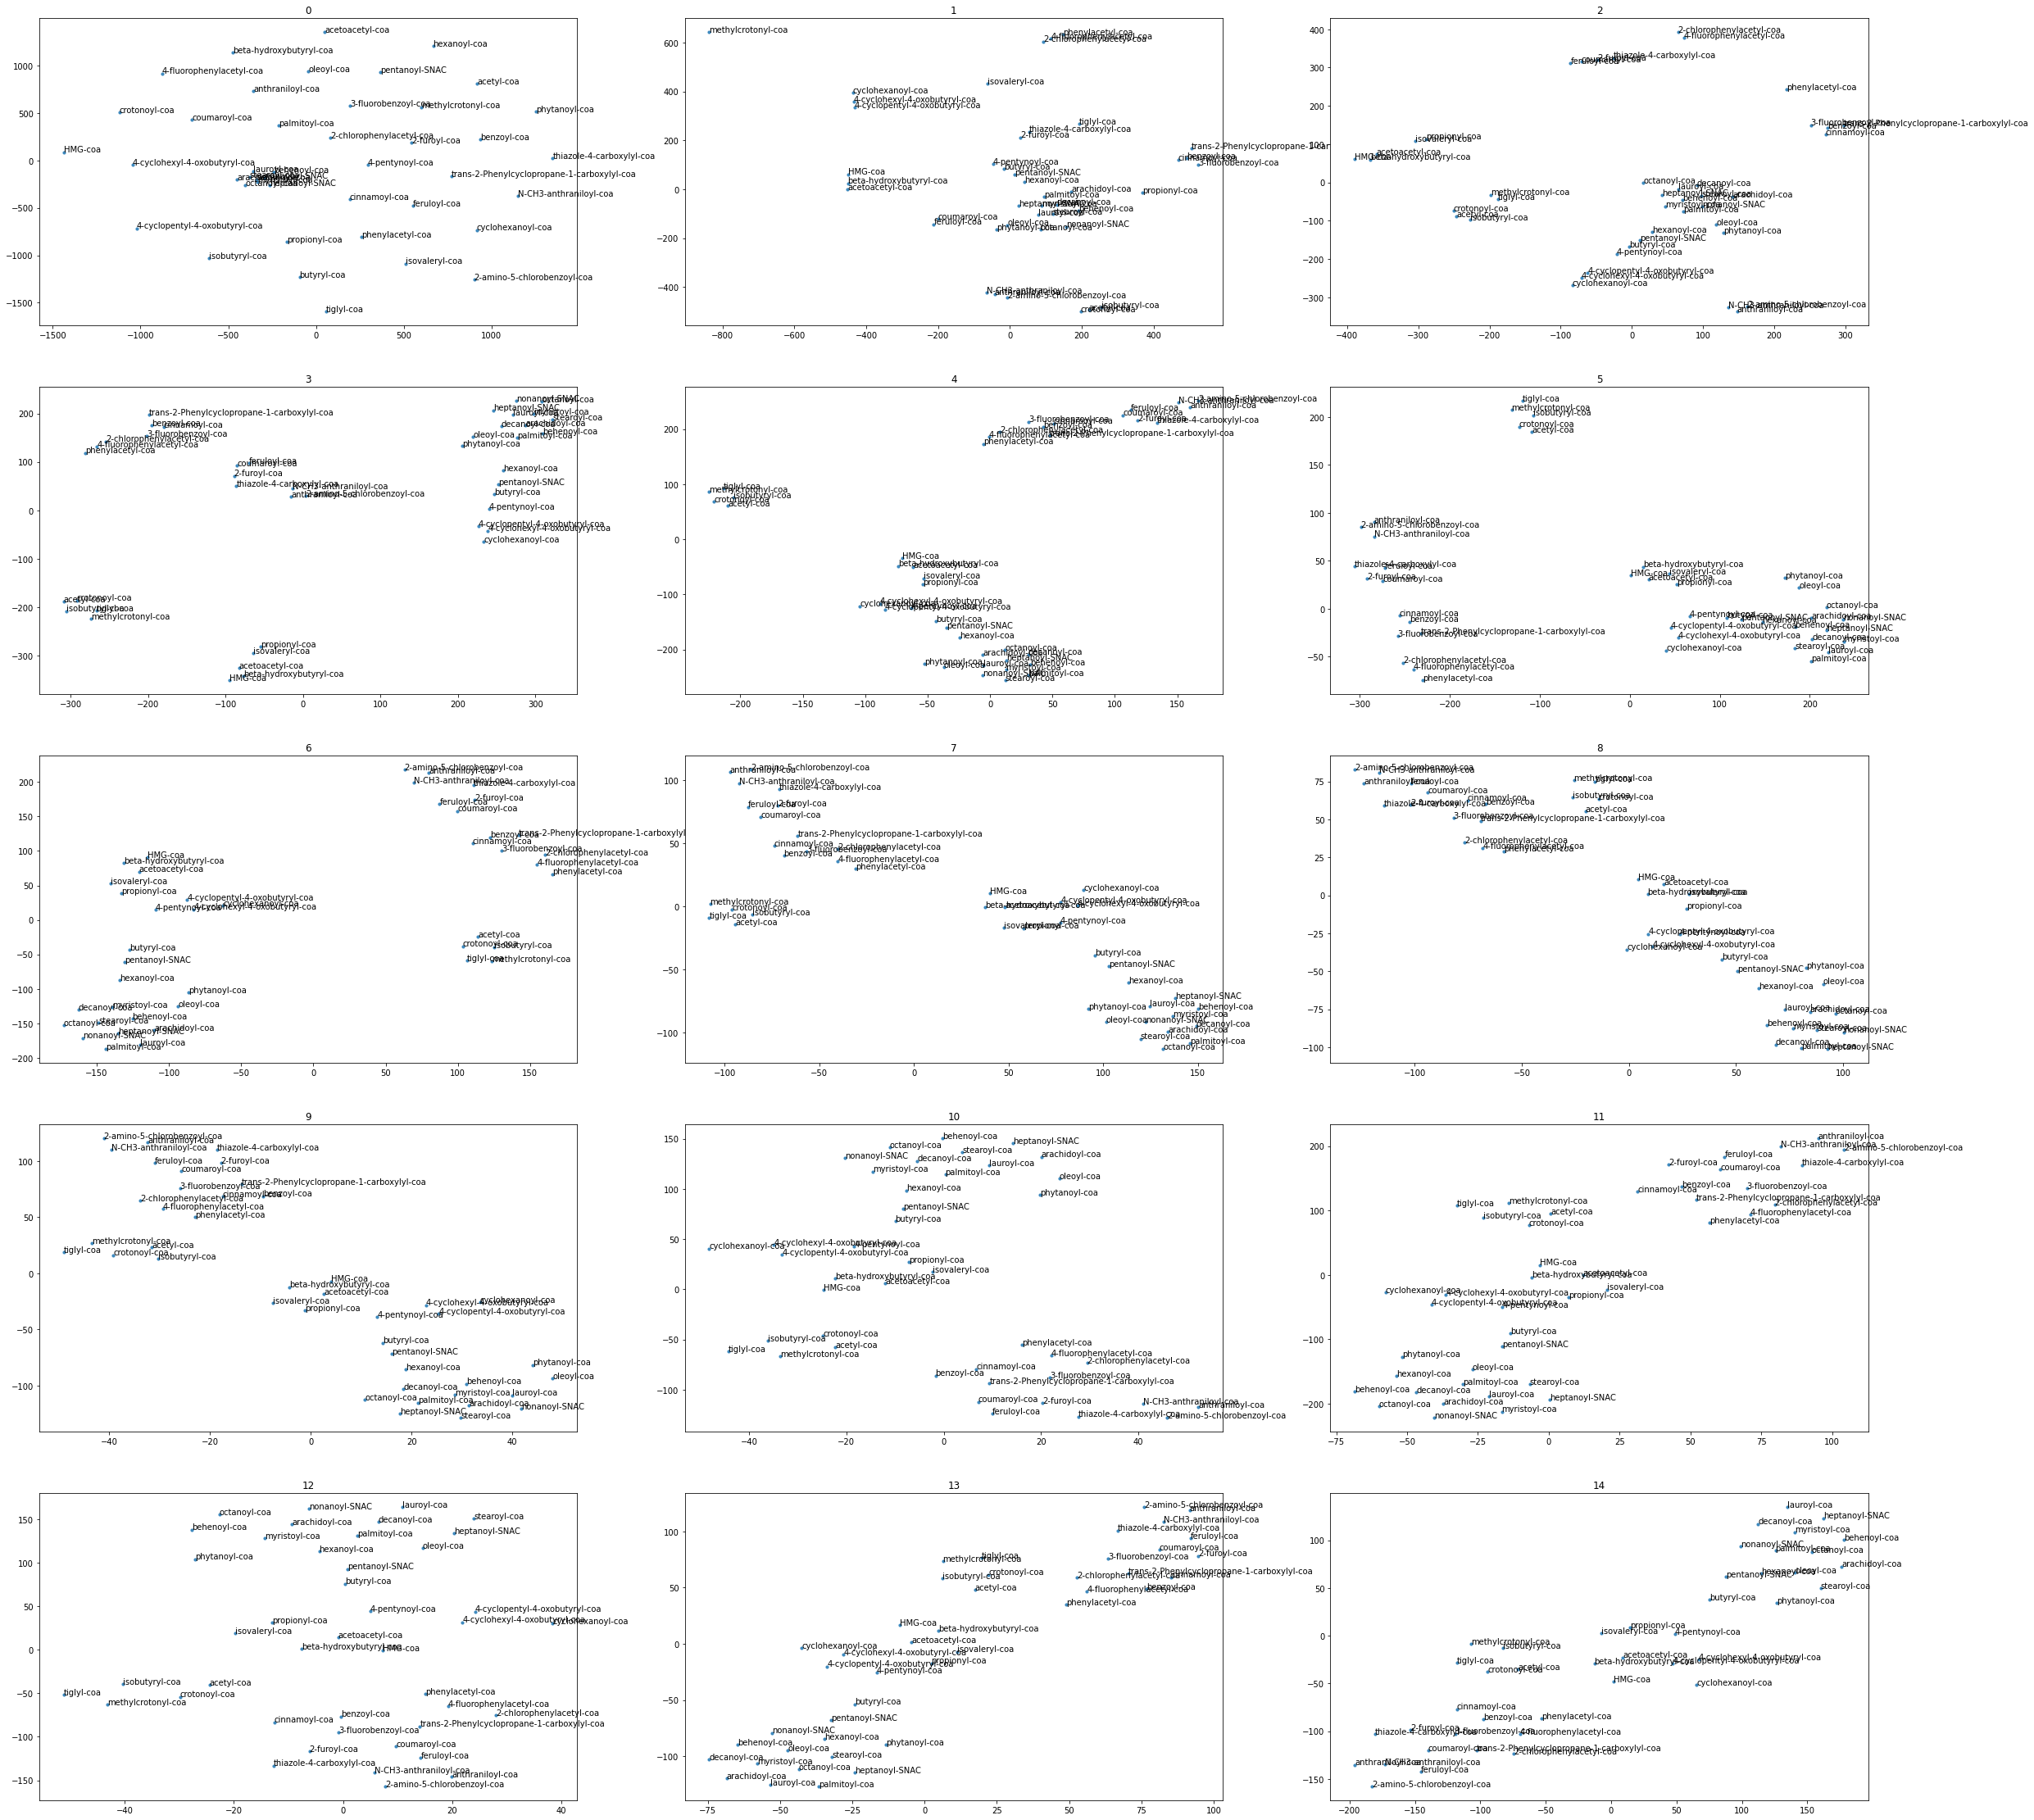

In [16]:
#selection of an optimal perplexity
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 5, ncols = 3 , figsize = (40,40))
n,k = 0,0
for item in S_t_sne:
    ax[n][k].scatter(S_t_sne[item]['tsne1'],S_t_sne[item]['tsne2'], s=10, alpha=0.8)
    ax[n][k].set_title(item)
    for j, label in enumerate(S_t_sne[item]['Substrate']):
        ax[n][k].text(S_t_sne[item]['tsne1'][j], S_t_sne[item]['tsne2'][j], label)
    k += 1
    if k % 3 ==0:
        n += 1
        k = 0

In [9]:
#saving an optimal clustering
df = pd.DataFrame(S_t_sne[10])
df.to_csv("../output_data/substrate_simmilarity_df.csv")